In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [90]:
df['x'] = df['x']**3
df

,dataset,x,y
0,I,1000.0,8.04
1,I,512.0,6.95
2,I,2197.0,7.58
3,I,729.0,8.81
4,I,1331.0,8.33
5,I,2744.0,9.96
6,I,216.0,7.24
7,I,64.0,4.26
8,I,1728.0,10.84
9,I,343.0,4.82


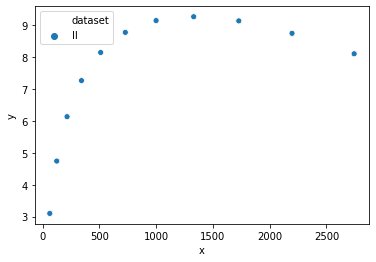

In [91]:
# plot dataset all datasets
sns.scatterplot(x='x', y='y', data=df[df['dataset'] == 'II'], hue='dataset')

In [92]:
df2 = df[df['dataset'] == 'II']

<Figure size 864x576 with 0 Axes>

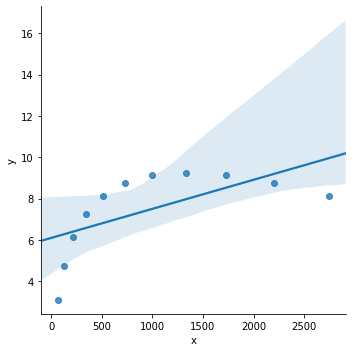

In [93]:
# plot dataset II
plt.figure(figsize=(12, 8))
sns.lmplot(x='x', y='y', data=df2)

In [94]:
# create X and y
X = df2[['x']]
y = df2['y'] + np.random.randn(df2.shape[0])

In [95]:
df2

,dataset,x,y
11,II,1000.0,9.14
12,II,512.0,8.14
13,II,2197.0,8.74
14,II,729.0,8.77
15,II,1331.0,9.26
16,II,2744.0,8.10
17,II,216.0,6.13
18,II,64.0,3.10
19,II,1728.0,9.13
20,II,343.0,7.26


In [8]:
# plot the linear regression into dataset II

In [96]:
# build a model with polynomial features
X['x2'] = X['x']**2

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
X

,x,x2
11,1000.0,1000000.0
12,512.0,262144.0
13,2197.0,4826809.0
14,729.0,531441.0
15,1331.0,1771561.0
16,2744.0,7529536.0
17,216.0,46656.0
18,64.0,4096.0
19,1728.0,2985984.0
20,343.0,117649.0


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
m = LinearRegression()

In [100]:
m.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
m.score(X, y)

0.8313581714845039

In [102]:
# plot the result
ypred = m.predict(X)

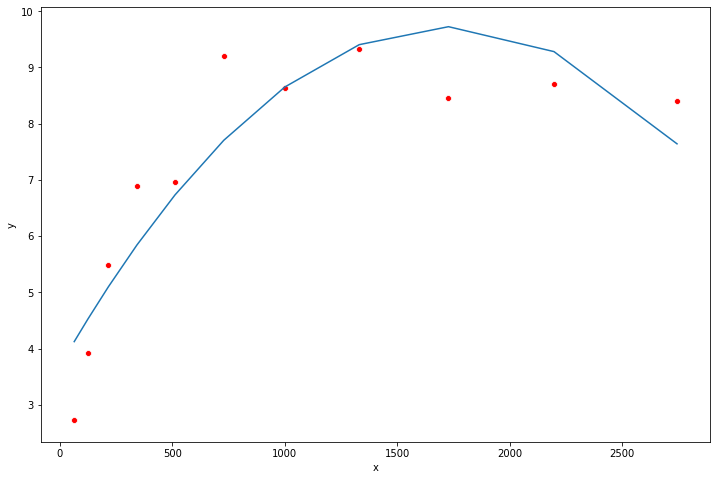

In [103]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=X['x'], y=ypred)
sns.scatterplot(x='x', y=y, data=df2, color='r')

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=0.6)
features = polynomial_features.fit_transform(df2[['x']])

In [106]:
features

array([[1.00000000e+00, 1.00000000e+03, 1.00000000e+06, 1.00000000e+09],
       [1.00000000e+00, 5.12000000e+02, 2.62144000e+05, 1.34217728e+08],
       [1.00000000e+00, 2.19700000e+03, 4.82680900e+06, 1.06044994e+10],
       [1.00000000e+00, 7.29000000e+02, 5.31441000e+05, 3.87420489e+08],
       [1.00000000e+00, 1.33100000e+03, 1.77156100e+06, 2.35794769e+09],
       [1.00000000e+00, 2.74400000e+03, 7.52953600e+06, 2.06610468e+10],
       [1.00000000e+00, 2.16000000e+02, 4.66560000e+04, 1.00776960e+07],
       [1.00000000e+00, 6.40000000e+01, 4.09600000e+03, 2.62144000e+05],
       [1.00000000e+00, 1.72800000e+03, 2.98598400e+06, 5.15978035e+09],
       [1.00000000e+00, 3.43000000e+02, 1.17649000e+05, 4.03536070e+07],
       [1.00000000e+00, 1.25000000e+02, 1.56250000e+04, 1.95312500e+06]])

In [107]:
# introduce Pipelin, make_pipelin
from sklearn.pipeline import Pipeline, make_pipeline

In [108]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

In [118]:
pipeline.fit(df2[['x']], y)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [119]:
pipeline.score(df2[['x']], y)

0.3520538317261762

In [111]:
# introduce or look at statsmodels.api for degree 2 and 3 polynomial features
import statsmodels.api as sm

In [112]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
features = polynomial_features.fit_transform(df2[['x']])

In [113]:
exog_features = sm.add_constant(features)
model = sm.OLS(y, exog_features)
results = model.fit()

In [114]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     44.38
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           6.36e-05
Time:                        15:57:11   Log-Likelihood:                -7.4020
No. Observations:                  11   AIC:                             22.80
Df Residuals:                       7   BIC:                             24.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4134      0.485      4.975      0.0

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


## Try a more complicated function

In [115]:
from sklearn.model_selection import cross_val_score
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [116]:
# create an x-array
# create an array of y-observations
# create the true y
X = np.sort(np.random.rand(n_samples))
y_train = true_fun(X) + np.random.randn(n_samples) * 0.1
y_true = true_fun(X)
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

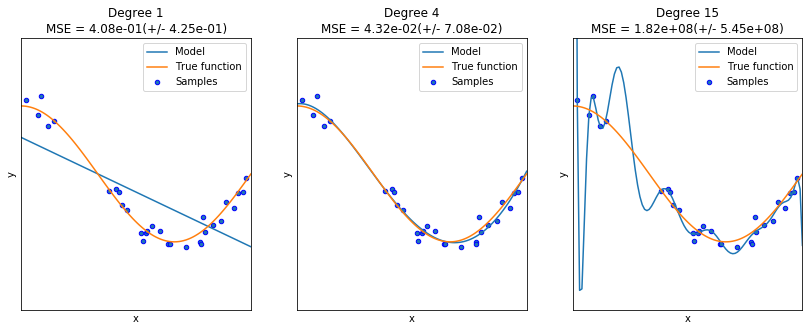

In [117]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()